## Prediction of Customer Churn at a Bank

Customer churn rate, also known as customer churn, refers to the phenomenon where a customer leaving a company.

### Project objectives:
In this project, We will analyze and visualize the data, then we will classify the customers between subscribers and unsubscribers using supervised machine learning techniques.

![](img.png) 

### Project life cycle

#### 1. Data collection and manipulation
#### 2. Exploratory data analysis
$\;\;$ 2.1 Missing values<br>
$\;\;$ 2.1 Analyze the unsubscribe / subscribe rate<br> 
$\;\;$ 2.2 Separation of customers into two datasets (Subscribe / Unsubscribe)<br>
$\;\;$ 2.3 Descriptors (categorical / numeric)<br>
$\;\;\;\;\;$ 2.3.1 Analysis of the distribution of categorical variables<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 2.3.1.1 Geography <br>
$\;\;\;\;\;\;\;\;\;\;\;$ 2.3.1.2 Gender <br>
$\;\;\;\;\;\;\;\;\;\;\;$ 2.3.1.3 Number of products <br>
$\;\;\;\;\;\;\;\;\;\;\;$ 2.3.1.4 Has card <br>
$\;\;\;\;\;\;\;\;\;\;\;$ 2.3.1.5 Active Member<br>
$\;\;\;\;\;$ 2.3.2 Analysis of the distribution of continuous variables<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 2.3.2.1 Credit Score<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 2.3.2.2 Age<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 2.3.2.3 Estimated Salary <br>
$\;\;\;\;\;$ 2.3.3 Scatter Plot<br>
$\;\;\;\;\;$ 2.3.4 Correlation (Numeric Variables)<br>
$\;\;\;\;\;$ 2.3.5 Outlier detection<br>
#### 3. Features engineering
$\;\;$ 3.1 Encoding of categorical variables<br>
$\;\;$ 3.2 Discover the importance of predictors<br>
$\;\;\;\;\;$ 3.2.1 Feature selection<br>
#### 4. Development, evaluation and optimization of models
$\;\;$ 4.1 Import the different models<br>
$\;\;$ 4.2 Divide data<br>
$\;\;$ 4.3 Training and Testing Models with the Confusion Matrix<br>
$\;\;$ 4.4 Test the ROC_AUC / ACC models<br>
$\;\;$ 4.5 Model optimization<br>
$\;\;\;\;\;$ 4.5.1 Implementation of cross-validation<br>
$\;\;\;\;\;$ 4.5.2 hyperparameter tuning<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 4.5.2.1 Hyperparameters for AdaBoost<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 4.5.2.2 Hyperparameters for GradientBoosting<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 4.5.2.3 Hyperparameters for Xgboost<br>
$\;\;\;\;\;$ 4.5.3 Validate the robustness of models based on the new hyperparameters<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 4.5.3.1 Comparison of models (AdaBoost and Gradient Bossting) with or without hyperparameter optimization<br>
$\;\;\;\;\;\;\;\;\;\;\;$ 4.5.3.2 Test the 3 models separately on X_test<br>
$\;\;\;\;\;$ 4.5.4 Data transformation<br>
$\;\;\;\;\;$ 4.5.5 Set model based on the vote <br>
$\;\;\;\;\;$ 4.5.6 Comparison between optimized models and standard models (roc_auc score)<br>
#### Conclusion

## 1. Data collection and manipulation

In [1]:
# Import Libraries
from __future__ import print_function
import numpy as np
import pandas as pd 
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualisation
py.init_notebook_mode(connected=True) #visualisation
import plotly.graph_objs as go #visualisation
import plotly.tools as tls #visualisation
import plotly.figure_factory as ff #visualisation
import plotly_express as px #visualisation

In [2]:
# load the database
data = pd.read_csv('Churn_Modelling.csv')

# Display the first 5 rows of the database
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

The database consists of 10,000 observations and 12 variables. Independent variables contain information about customers. The dependent variable 'Exited' refers to the customer's abandoned status.

We can see that the names of the descriptors are not consistent

In [4]:
# Convert all column headers (descriptors) to lowercase
nettoyage_colonnes_noms = []
colonnes = data.columns
for i in range(len(colonnes)):
    nettoyage_colonnes_noms.append(colonnes[i].lower())
data.columns = nettoyage_colonnes_noms
data.head(2)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


## 2. Exploratory data analysis (EDA)

In [5]:
# View database information, including shape, type, and descriptor name, ...etc,  for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Count the number of unique values for each descriptor
data.nunique()

rownumber          10000
customerid         10000
surname             2932
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
exited                 2
dtype: int64

As we can see, the Rownumber variable is a record counter, the values of the customerid variable are unique identifiers for each customer, and the surname variable also captures the profiling of a customer (Name). I will delete them from the database, as they do not give useful information in the exploratory analysis.

In [7]:
# Remove irrelevant variables as shown above
data = data.drop(["rownumber", "customerid", "surname"], axis = 1)

In [8]:
# Describe all the statistical properties of the database
data.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Missing values

In [9]:
data.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

As can be seen, there is no missing value in the database.

#### 2.1 Analyze the unsubscribe / subscribe rate

In [10]:
# Percentage by category for the target variable.
pourcentage_labels = data['exited'].value_counts(normalize = True) * 100
print("Percentage of non-unsubscribe (1):",round(pourcentage_labels[0],2), "%")
print("Percentage of Unsubscribe (0):",round(pourcentage_labels[1],2), "%")

Percentage of non-unsubscribe (1): 79.63 %
Percentage of Unsubscribe (0): 20.37 %


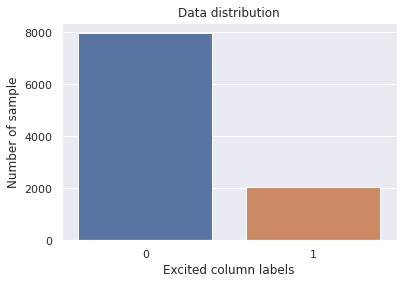

In [11]:
# Plot the distribution of the data
sns.set()
sns.countplot(data.exited).set_title('Data distribution')
ax = plt.gca()
sns.set(font_scale=1.5)
ax.set_xlabel("Excited column labels")
ax.set_ylabel("Number of sample")
plt.show()

From this graph, we can see that there are more sample with target tag = $ 0 $ ($ 79.63 \% $) compared to target tag = $ 1 $ (20.37 $ \% $). Based on these results, we can conclude that the database is unbalanced.

#### 2.2 Separation of customers into two datasets (Subscribe / Unsubscribe)

In [12]:
# The purpose of the separation of customer is to get more insight into the data separately in the exploratory analysis
desabonnes = data[data["exited"] == 1]
abonnes = data[data["exited"] == 0]

#### 2.3 Descriptors (categorical / numeric)

In [13]:
# Select descriptors with less than 6 unique values as categorical descriptors
target_col = ["exited"]
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]

# Select descriptors with more than 6 unique values as numeric descriptors
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]

print("Categorical descriptors:", cat_cols, '\n')
print("Numeric descriptors:", num_cols)

Categorical descriptors: ['geography', 'gender', 'numofproducts', 'hascrcard', 'isactivemember'] 

Numeric descriptors: ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']


#### 2.3.1 Analysis of the distribution of categorical variables

In [14]:
# function for the graphical representation in bar for a descriptor according to the exited target
def plot_bar(data, column):
    df_data = data.copy()
    total_len = len(data[column])
    sns.set()
    fig = plt.figure(figsize=(8,6))
    ax = sns.countplot(df_data['exited'],hue=df_data[column]).set_title(" Customer distribution based on:  " +column)
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 2,
                '{:.2f}%'.format(100 * (height/total_len)),
                fontsize=14, ha='center', va='bottom')
    sns.set(font_scale=1.5)
    ax.set_xlabel("The exited target")
    ax.set_ylabel("Number of sample")
    plt.show()

In [15]:
# function for the graphical representation (pie chart) for a descriptor according to the target exited
def plot_pie(column) : 
    trace1 = go.Pie(values  = desabonnes[column].value_counts().values.tolist(),
                    labels  = desabonnes[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Unsubscribed customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = abonnes[column].value_counts().values.tolist(),
                    labels  = abonnes[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Subscribed customers" 
                   )
    layout = go.Layout(dict(title = " Distribution of customers separately (Subscribe / Unsubscribe) based on:  " +column ,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Unsubscribed customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Clients abonnés",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .82,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    fig.update_layout(autosize=False, width=950, height=400,)
    py.iplot(fig)

#### 2.3.1.1 Geography

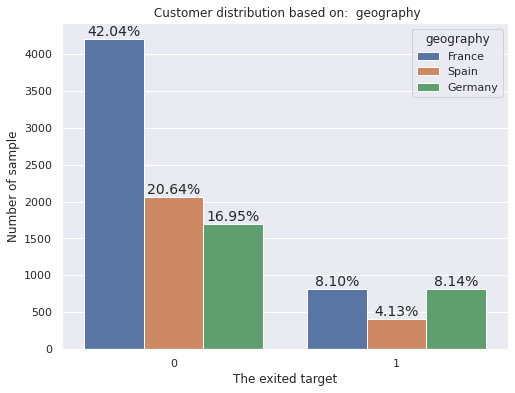

In [16]:
# Call the plot_bar function and plot the bar diagram for the geography descriptor
plot_bar(data, cat_cols[0])
# Calling the plot_pie function to plot the pie chart for the geography descriptor
plot_pie(cat_cols[0])

The output of bar-plot shows that among the unsubscribed customers, those who are geographically
located in Germany have a high churn rate with $ 8.14 \% $, followed by France with $ 8.10 \% $
and Spain with $ 4.13 \% $. For customers remaining subscribed, France is in the lead with $ 42.04 \% $,
Spain with $ 20.64 \% $ and Germany with $ 16.95 \% $. The pie chart gives in more detail the geographic distribution of customers separately (Subscribe / Unsubscribe).

Note: For more information on the pie chart, just hover the mouse cursor over the chart.

#### 2.3.1.2 Sexe

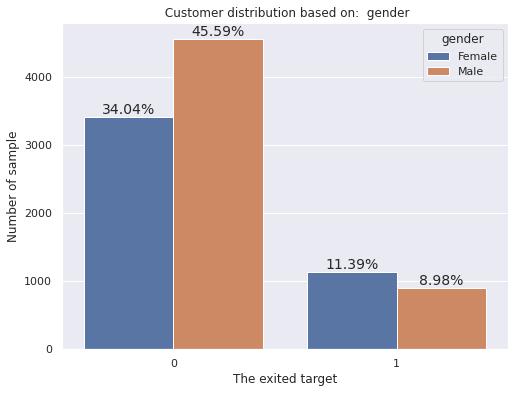

In [17]:
# Call the plot_bar function and plot the bar diagram for the gender descriptor
plot_bar(data, cat_cols[1])
# Call the function to plot the pie chart for the gender descriptor
plot_pie(cat_cols[1])

The output of bar-plot shows us the Subscribe / Unsubscribe rate based on gender, women have an unsubscribe rate equal to $ 11.39 \% $, while the rate for men equals $ 8.98 \% $. In the case of subscriptions; $ 45.59 \% $ are male and $ 34.04 \% $ are female.

#### 2.3.1.3 Number of products

posx and posy should be finite values
posx and posy should be finite values


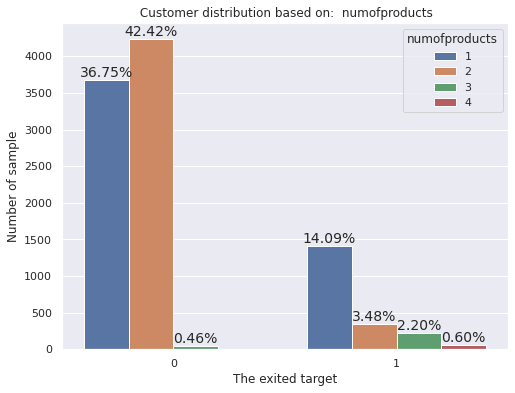

In [18]:
# Call the plot_bar function and plot the bar diagram for the numofproducts descriptor
plot_bar(data, cat_cols[2])
# Call of the function to plot the pie chart for the numofproducts descriptor
plot_pie(cat_cols[2])

The bar-plot graph shows that among the customers who unsubscribe are those who use a single product with a high rate: $ 14.09 \% $, followed by those who use two products with a rate: $ 3.48 \ % $, three products with a rate: $ 2.20 \% $ and four products with a rate: 0.60 $ \% $.

#### 2.3.1.4 Has card

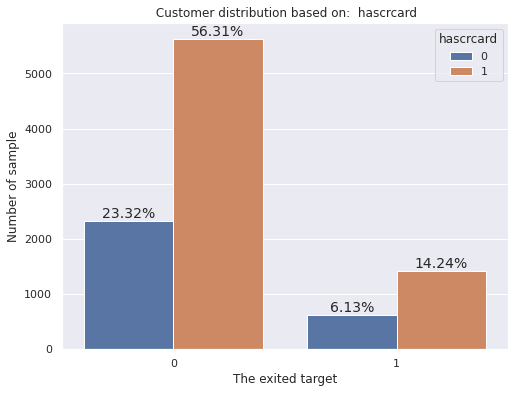

In [19]:
# Call the plot_bar function and plot the bar diagram for the hascard descriptor
plot_bar(data, cat_cols[3])
# Call of the function to plot the pie chart for the hascard descriptor
plot_pie(cat_cols[3])

The output of bar-plot shows us that for unsubscribed customers, those who have a card with a rate: $ 14.24 \% $, while those who do not have a card the rate is $ 6.13 \% $ .

#### 2.3.1.5 Active Member

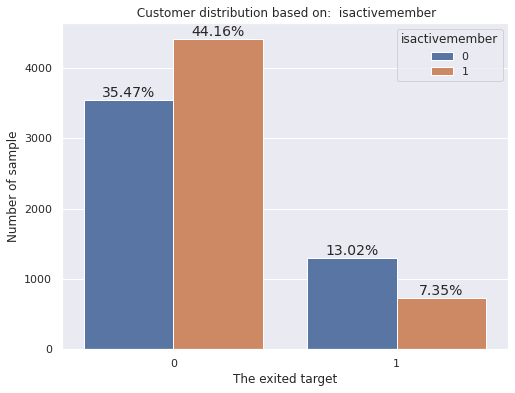

In [20]:
# Calling the plot_bar function and plot the bar diagram for the isactivemember descriptor
plot_bar(data, cat_cols[4])
# Calling the function to plot the pie chart for the isactivemember descriptor
plot_pie(cat_cols[4])

The output of bar-plot shows us that among the unsubscribed customers, those who are not active members with a high churn rate equal to $ 13.02 \% $, and the churn rate for active members equal to 07.35 \% $.

#### 2.3.2 Analysis of the distribution of continuous variables

In [21]:
# histogram function
def hist_plot(data, colonne):
    ax = sns.FacetGrid(data, col = "exited", height=10)
    ax.map(sns.distplot, colonne, bins = 25)
    plt.show()

In [22]:
# histogram function for subscribed customers and unsubscribed customers
def histogram(column) :
    trace1 = go.Histogram(x  = desabonnes[column],
                          histnorm= "percent",
                          name = "Unsubscribed customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = abonnes[column],
                          histnorm = "percent",
                          name = "Subscribed customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title = " Distribution of customers according to: " +column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)

#### 2.3.2.1 Credit Score

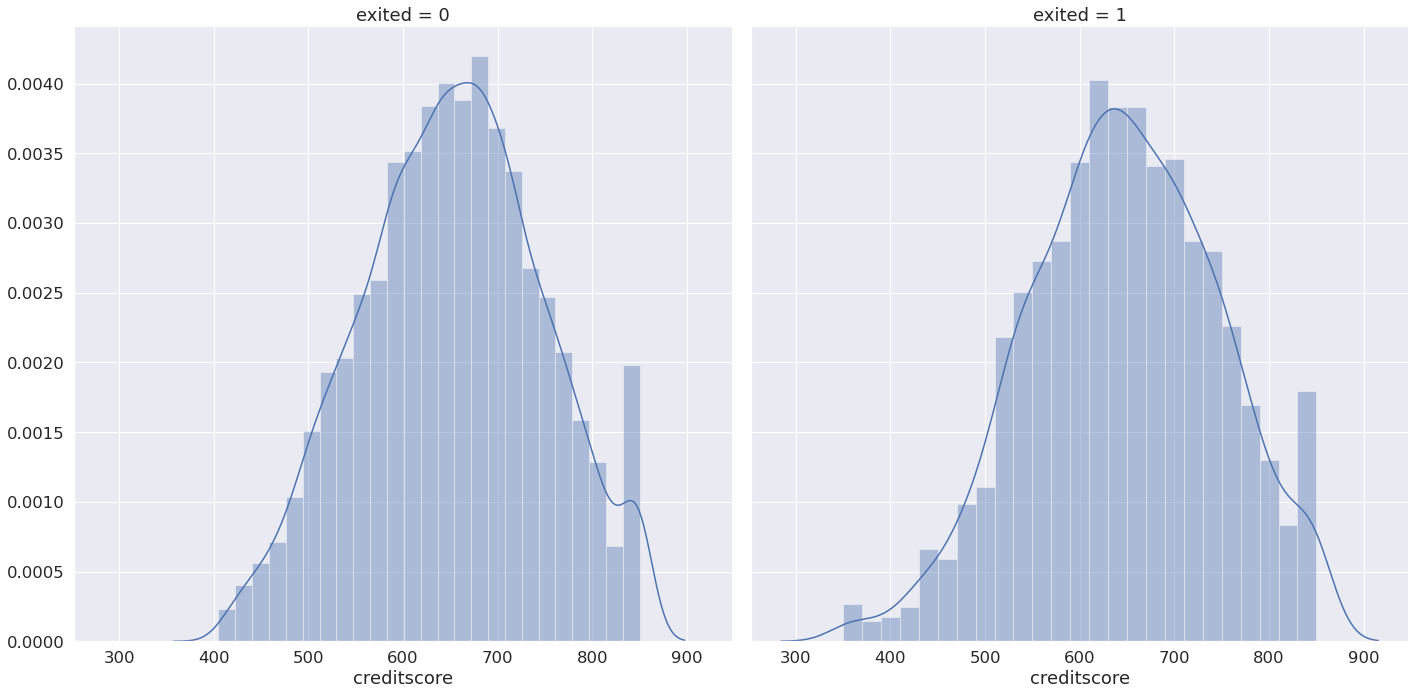

In [23]:
# Call the histogram function to plot two histogram + curve (subscribers / unsubscribers) for the creditscore descriptor
hist_plot(data, num_cols[0])
# Call the hist_plot function to plot the histogram of the creditscore descriptor
histogram(num_cols[0])

The data distribution is almost symmetrical, but we notice a weird phenomenon in the credit score above 850 points (graph 2); the unsubscribe and subscribe rate is equal but at the same time is high for the dataset as most of the time customers with high credit scores tend to stay in banks.

Note: For more information on Graph 2, just hover the mouse cursor over the graph.

#### 2.3.2.2 Age

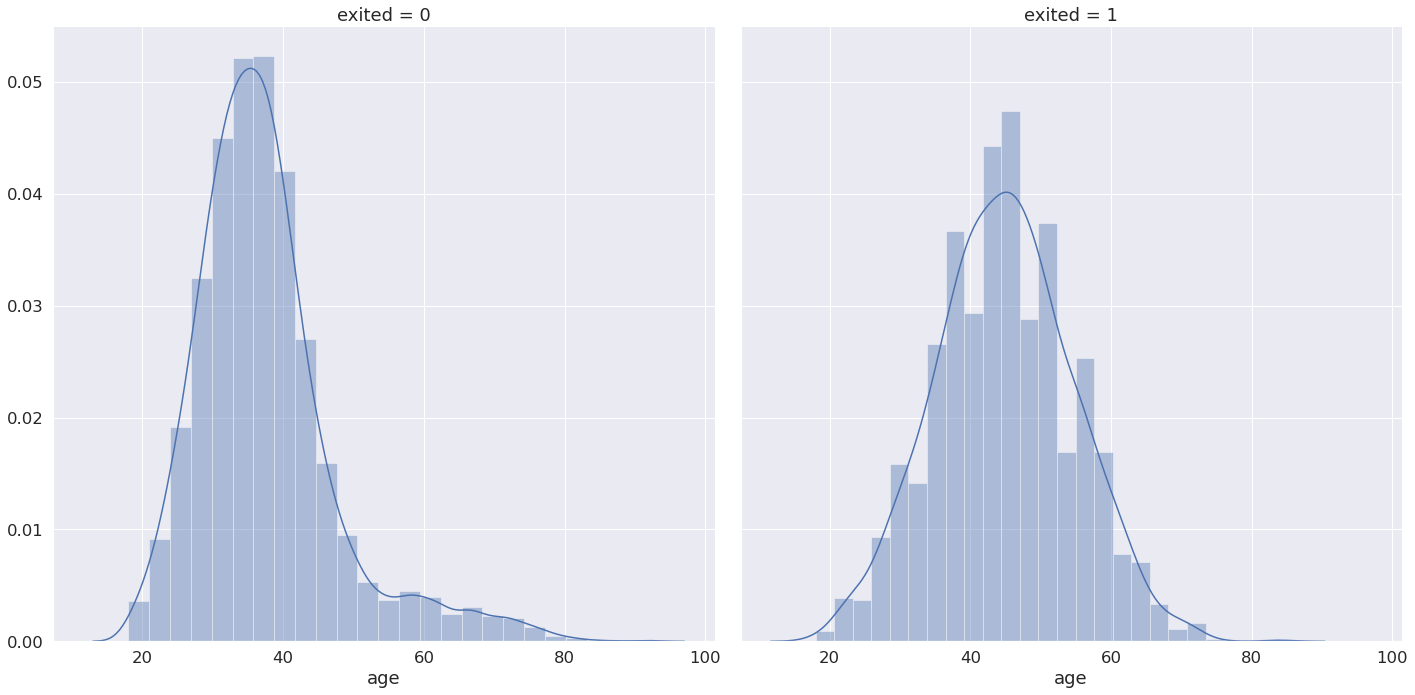

In [24]:
# Call the histogram function to plot two histogram + curve (subscribers / unsubscribers) for the Age descriptor
hist_plot(data, num_cols[1])
# Calling the hist_plot function to plot the Age descriptor histogram
histogram(num_cols[1])

The 2nd graph above shows us that the most unsubscribed customers are between 46 years and over. It appears that younger customers tend to remain more loyal to the bank than older customers.

#### 2.3.2.3 Estimated Salary

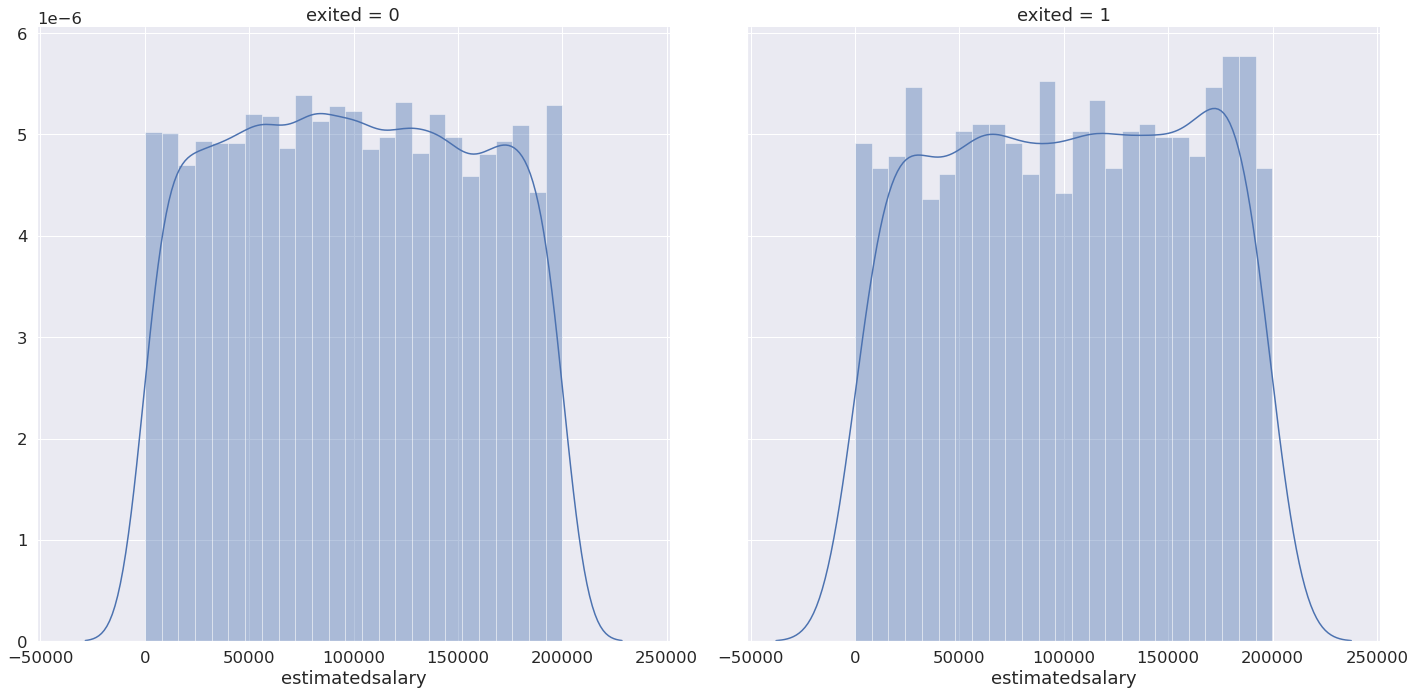

In [25]:
# Call the histogram function to plot two histogram + curve (subscribers / unsubscribers) for the estimatedsalary descriptor
hist_plot(data, num_cols[4])
# Callthe hist_plot function to plot the estimatedsalary descriptor histogram
histogram(num_cols[4])

The distribution of salary in the graphs is uniform, and does not give us a lot of information about this descriptor

#### 2.3.3 Scatter Plot

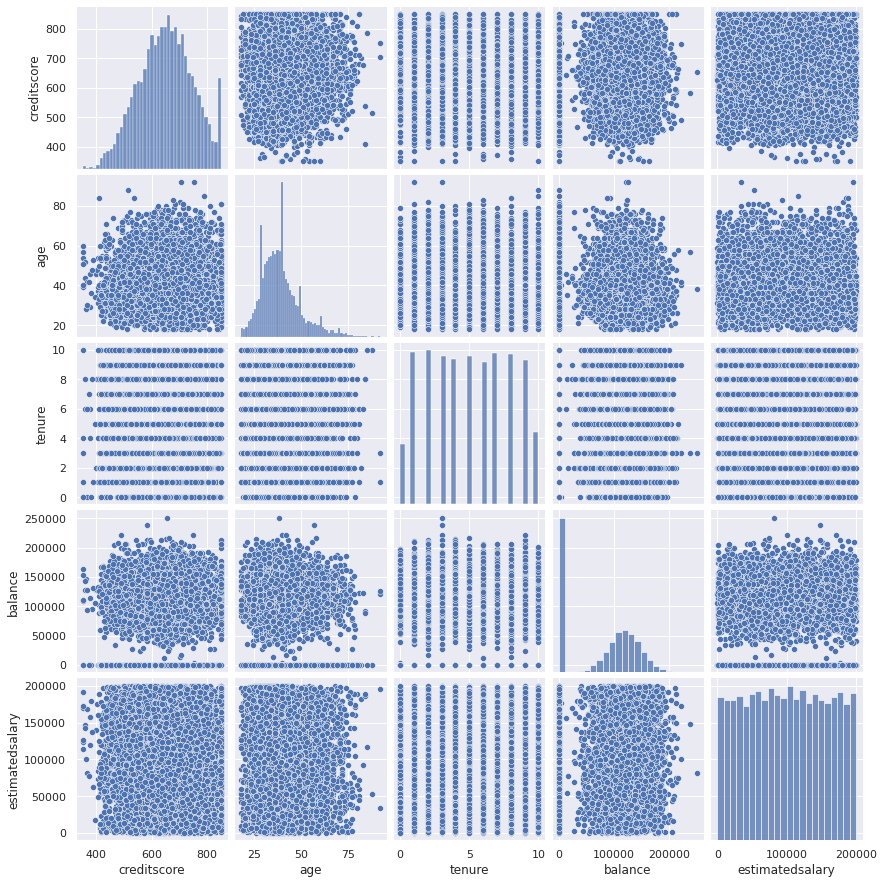

In [26]:
#scatterplot
sns.set()
cols = num_cols
sns.pairplot(data[cols], size = 2.5)
plt.show();

The scatterplot clouds give us an idea of the relationships between the variables. Note that there is no linear relationship between the numerical variables. and this concludes that no correlation between the variables. We will confirm this hypothesis in the next section with the correlation matrix.

#### 2.3.4 Corrélation

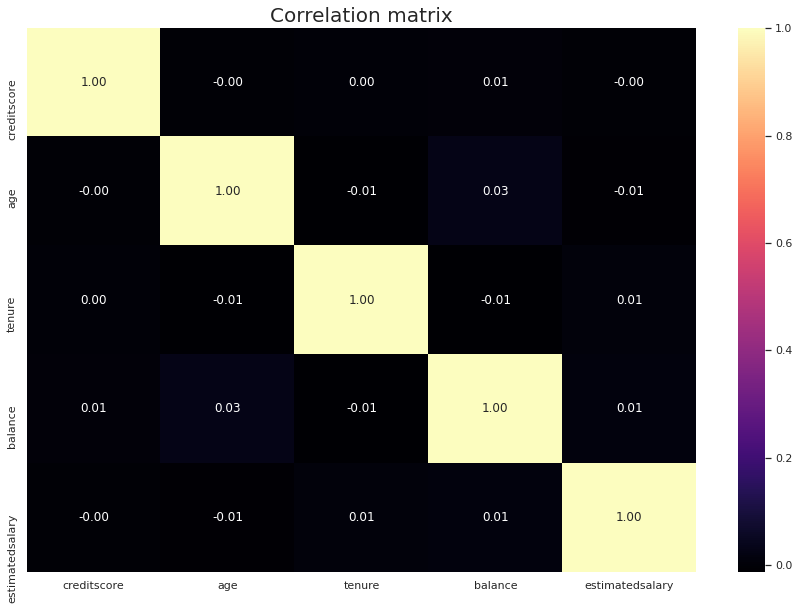

In [27]:
# Correlation matrix
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation matrix", fontsize=20)
plt.show()

As the figure shows, there is no significant correlation between the numeric variables.

#### 2.3.5 Outlier detection

In this part, I will try to detect outliers.

Note: For more information on the box-plot, simply hover the mouse cursor over the graph.

In [28]:
# Boxplot function (creditscore)
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = data[num_cols[:1]]
gen_boxplot(new_df)
data_ = trace
py.iplot(data_)

In [29]:
# Boxplot function (tenure)
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = data[num_cols[2:3]]
gen_boxplot(new_df)
data_ = trace
py.iplot(data_)

In [30]:
# Boxplot function ( Age)
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = data[num_cols[1:2]]
gen_boxplot(new_df)
data_ = trace
py.iplot(data_)

The age boxplot tells us that there are few outliers. As we can see (the two extreme values of the age boxplot).

In [31]:
# Boxplot function (balance et estimatedSalary)
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = data[num_cols[3:]]
gen_boxplot(new_df)
data_ = trace
py.iplot(data_)

The graph above does not show anything abnormal with the variables balance and estimatedSalary.

## 3. Features engineering

### 3.1 Encoding of categorical variables

Application of One-Hot encoding on categorical variables 'geography and' and 'gender'

In [32]:
# Applying One-Hot encoding to categorical variables
list_cat = ['geography', 'gender']
train_test_data = pd.get_dummies(data, columns = list_cat, prefix = list_cat)
# Show the first five lines
train_test_data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### 3.2 Discover the importance of predictors

In order to get a rough idea about the important predictors, I apply the Random Forest to find out the important characteristics for our target.

In [33]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Train the Random Forest model  and generate the importance of predictors
X = train_test_data.drop('exited', axis=1)
y = train_test_data.exited
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 100, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) creditscore                    0.239072
 2) age                            0.146101
 3) tenure                         0.144845
 4) balance                        0.142333
 5) numofproducts                  0.125054
 6) hascrcard                      0.085224
 7) isactivemember                 0.042107
 8) estimatedsalary                0.020549
 9) geography_France               0.017904
10) geography_Germany              0.010410
11) geography_Spain                0.009040
12) gender_Female                  0.008845
13) gender_Male                    0.008514


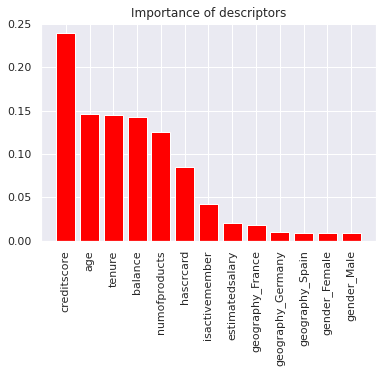

In [35]:
# Visualization of the importance of predictors
plt.title('Importance of descriptors')
plt.bar(range(X.shape[1]), importances[indices], color = "red", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

The above graph shows the descriptors with the highest importance value at the lowest importance value. It shows that the most important descriptors are creditscore, age, tenure, balance, etc.

#### 3.2.1 Feature selection
In the process of building ML models, we will use all descriptors.

## 4. Development, evaluation and optimization of models
Because, we are dealing with a critical banking problem, for this, we need a model with high performance. Here I am going to try 6 machine learning algorithms, with the aim to find the machine learning algorithm that works best. In addition, we will perform a precision comparison between them for the final choice.
Since the project is a classification problem, the algorithms we will choose are the following:
* K-Nearest Neighbor (KNN)
* Logistic Regression (LR)
* AdaBoost
* Gradient Boosting (GB)
* RandomForest (RF)
* Xgboost (XGB)

### 4.1 Import the different models

In [36]:
# Import different models 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.model_selection import train_test_split
# Score function
from sklearn.metrics import roc_auc_score, roc_curve, recall_score

### 4.2 Divide data

In [37]:
X = train_test_data.drop('exited', axis=1)
y = train_test_data.exited

As you can see from the code above, variable X contains all columns except the target column titled *exited*

In [38]:
# Splitting the dataset into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

The code above splits the database. 

We will use 75 $ \% $ of the data for thw training process, and when the training is complete, we will use the remaining 25 $ \% $ of the data to verify the accuracy of our trained model.

### 4.3 Training and Testing Models with the Confusion Matrix

In [39]:
# KNN Initialisation
knMod = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2,
                             metric = 'minkowski', metric_params = None)

# Train model with training data
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
# Confusion Matrix, and the predicted classes 
y_pred = knMod.predict(X_test)  

df_confusion = pd.crosstab(y_test,y_pred)
df_confusion

col_0,0,1
exited,,
0,1491,116
1,356,37


In [41]:
# Initialization of the Logistic Regression
lrMod = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True,
                            intercept_scaling = 1, class_weight = None, 
                            random_state = None, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)
# Train model with training data
lrMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', solver='liblinear', verbose=2)

In [42]:
# Confusion Matrix, and the predicted classes 
y_pred = lrMod.predict(X_test)  

df_confusion = pd.crosstab(y_test,y_pred)
df_confusion

col_0,0,1
exited,,
0,1575,32
1,364,29


In [43]:
# Initialization of the AdaBoost
adaMod = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)
# Train model with training data
adaMod.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [44]:
# Confusion Matrix, and the predicted classes 
y_pred = adaMod.predict(X_test)  

df_confusion = pd.crosstab(y_test,y_pred)
df_confusion

col_0,0,1
exited,,
0,1524,83
1,204,189


In [45]:
# Initialization of the AdaBoost
gbMod = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)
# Train model with training data  
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [46]:
# Confusion Matrix, and the predicted classes 
y_pred = gbMod.predict(X_test)  

df_confusion = pd.crosstab(y_test,y_pred)
df_confusion

col_0,0,1
exited,,
0,1537,70
1,197,196


In [47]:
# Initialization of Random Forest 
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')
# Train model with training data  
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [48]:
# Confusion Matrix, and the predicted classes 
y_pred = rfMod.predict(X_test)  

df_confusion = pd.crosstab(y_test,y_pred)
df_confusion

col_0,0,1
exited,,
0,1552,55
1,220,173


In [49]:
# Initialization of XGBoost 
xgbMod = xgboost.XGBClassifier()
# Train model with training data  
xgbMod.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
# Confusion Matrix, and the predicted classes 
y_pred = xgbMod.predict(X_test)  

df_confusion = pd.crosstab(y_test,y_pred)
df_confusion

col_0,0,1
exited,,
0,1523,84
1,194,199


We notice that the xgboost model is the most efficient in terms of error in the detection of customers who will leave the bank with FP = 199 and with less than FN = 194 compared to the other models, the LR is the bad model with a FN = 364.

To avoid losing clients, the best practice is to minimize the FN -> 0 (Recall to 100%), and try to keep a reasonable FP rate.

### 4.4 Test the ROC_AUC / ACC models 

In this section, we are implementing code that will give us an idea of how our trained models perform on the test data. We use Accuracy metrics and AUC-ROC score during this process.

Why ROC as metric?

(ROC) is frequently used to evaluate the performance of binary classification algorithms. It provides a graphical representation of a classifier's performance, rather than a single value like most other metrics.

One advantage of ROC curves is that they help us find a classification threshold that suits our specific problem. Moreover, ROC curves and AUC scores also allow us to compare the performance of different classifiers for the same problem.

In [51]:
# Calculation the accuracy of the knn model on the test data
knn_acc = knMod.score(X_test, y_test)
# Return probability estimates for test data
test_labels = knMod.predict_proba(np.array(X_test.values))[:,1]
# Compute 'Area Under the Receiver Operating Characteristic Curve (ROC AUC)' from the prediction scores
knn_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

In [52]:
# Calculation the accuracy of the LR model on the test data
lr_acc = lrMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = lrMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

In [53]:
# Calculation the accuracy of the ADA model on the test data
ada_acc = adaMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = adaMod.predict_proba(np.array(X_test.values))[:,1]
# Compute 'Area Under the Receiver Operating Characteristic Curve (ROC AUC)' from the prediction scores
ada_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [54]:
# Calculation the accuracy of the GB model on the test data
gb_acc = gbMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = gbMod.predict_proba(np.array(X_test.values))[:,1]
# Compute 'Area Under the Receiver Operating Characteristic Curve (ROC AUC)' from the prediction scores
gb_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [55]:
# Calculation the accuracy of the RF model on the test data
rf_acc = rfMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
# Compute 'Area Under the Receiver Operating Characteristic Curve (ROC AUC)' from the prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [56]:
# Calculation the accuracy of the XGB model on the test data
xgb_acc = xgbMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = xgbMod.predict_proba(np.array(X_test.values))[:,1]
# Compute 'Area Under the Receiver Operating Characteristic Curve (ROC AUC)' from the prediction scores
xgb_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [57]:
models = ['KNN', 'Logistic Regression', 'AdaBoost', 'GradientBoosting', 'Random Forest', 'xgboost']
accuracy = [knn_acc, lr_acc, ada_acc, gb_acc, rf_acc, xgb_acc]
roc_auc = [knn_roc_auc, lr_roc_auc, ada_roc_auc, gb_roc_auc, rf_roc_auc, xgb_roc_auc]

d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,accuracy,roc_auc
KNN,0.7640,0.537257
Logistic Regression,0.8020,0.675405
AdaBoost,0.8565,0.850311
GradientBoosting,0.8665,0.868167
Random Forest,0.8625,0.823329
xgboost,0.8610,0.850587


In the code above, we used the *score ()* function to calculate the average accuracy score, while the *roc_auc_score ()* function gives us the ROC-AUC score, which is more meaningful for us because the mean precision score considers only one threshold value, while the ROC-AUC score takes into account all possible threshold values and gives us the score.

#### Performance of 6 models based on ROC-AUC

In [58]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knMod.predict_proba(np.array(X_test.values))[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lrMod.predict_proba(np.array(X_test.values))[:,1])
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, adaMod.predict_proba(np.array(X_test.values))[:,1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfMod.predict_proba(np.array(X_test.values))[:,1])

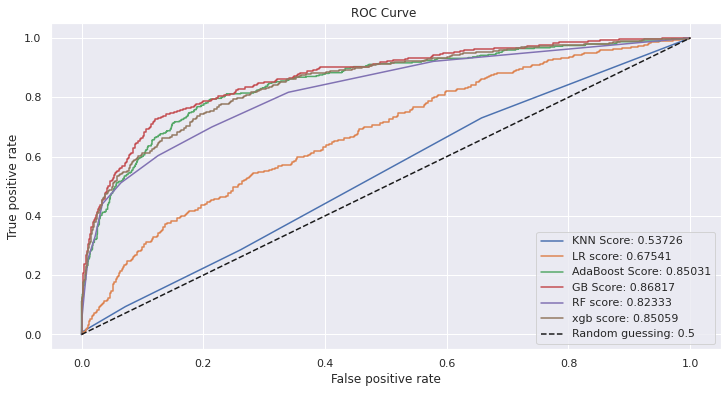

In [59]:
# Roc Curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(knn_roc_auc, 5)))
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(gb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot(fpr_xgb, tpr_xgb, label = 'xgb score: ' + str(round(xgb_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

The ROC Curve: The ROC curve is produced by calculating and plotting the rate of true positives versus the rate of false positives for a single classifier at a variety of thresholds.

As you can see above, GradientBoosting ($0.86$), XgbBoost ($0.85$), and AdaBoost ($0.84$) get a good ROC-AUC score on the test dataset. Other models, such as LR, KNN, and RF do not perform well on the test data set. From this step, I'll just work with the GradientBoosting, XgbBoost, and AdaBoost classifiers to improve their scores.

On remarque que avec le nouveau seuil de modele detecte moins de FN (- 100) et plus de TP

### 4.5 Model optimization
In this section, we will use the following techniques to improve model performance:
*  Cross-validation
*  Hyperparameter tuning

### 4.5.1 Implementation of cross-validation

Here I am going to implement K-folds cross validation. For a $K$ value $= 5$

In [60]:
# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function which gives as output the roc_auc measurement plus the standard deviation (STD)
def cvDict(functions, X_train, y_train, cv, scr):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        print('\n', str(func).split('(')[0],':', cvScore)
        cvDict[str(func).split('(')[0]] = [round(cvScore.mean(),2), cvScore.std()]
        
    return cvDict

In [61]:
models = [adaMod, gbMod, xgbMod]
print(' Roc_auc score for a cv = 5')
cvD = cvDict(models, X_train, y_train, 5, scr ='roc_auc')
print('\n','='*100, '\n')
print('Average Score plus STD for each model')
cvD

 Roc_auc score for a cv = 5

 AdaBoostClassifier : [0.83117618 0.8312496  0.85697307 0.83286979 0.83147559]

 GradientBoostingClassifier : [0.85323549 0.85805639 0.88064229 0.86305688 0.85519145]

 XGBClassifier : [0.83717307 0.83815965 0.8600891  0.84403301 0.84208877]


Average Score plus STD for each model


{'AdaBoostClassifier': [0.84, 0.010130841375402294],
 'GradientBoostingClassifier': [0.86, 0.009872896437241064],
 'XGBClassifier': [0.84, 0.008279532573959665]}

As we can see, in the output above, GradietBoosting, Xgboost, and Adaboost are performing well. This cross-validation score helps us to decide which model we should select and which we should not go with. Based on the average value of ROC_AUC and the value of the standard deviation, we can conclude that the ROC_AUC score does not deviate much for most models (models do not suffer from the overfitting problem).

### 4.5.2  Hyperparameter tuning

Here we will see how we can get optimum values for the parameters. The *RandomizedSearchCV* hyperparameter tuning method will be used in this process.

In [62]:
# Import RandomizedSearchCV and randint methodes
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [63]:
# Function timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes et %s seconds.' % (thour, tmin, round(tsec, 2)))

#### 4.5.2.1 Hyperparameters for AdaBoost

In [64]:
# Possible parameters
adaHyperParams = {'n_estimators': range(1,100,10)}

In [65]:
from datetime import datetime

# Initialization
gridSearchAda = RandomizedSearchCV(estimator = adaMod, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc')

start_time = timer(None) # the timer starts from this point 
gridSearchAda.fit(X_train, y_train) 
timer(start_time) # the timer ends here


 Time taken: 0 hours 0 minutes et 5.69 seconds.


In [66]:
# Display the best parameters with roc_auc score
gridSearchAda.best_params_, round(gridSearchAda.best_score_,4)

({'n_estimators': 21}, 0.8423)

#### 4.5.2.2 Hyperparamètres pour GradientBoosting

In [67]:
# Paramètres possibles
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': range(1,10)}

In [68]:
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = gbMod, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
start_time = timer(None) # the timer starts from this point  
gridSearchGB.fit(X_train, y_train) 
timer(start_time) # the timer ends here


 Time taken: 0 hours 2 minutes et 15.79 seconds.


In [69]:
# Display the best parameters with roc_auc score
gridSearchGB.best_params_, round(gridSearchGB.best_score_,2)

({'loss': 'exponential', 'max_depth': 4, 'n_estimators': 81}, 0.86)

#### 4.5.2.3 Hyperparamètres pour  Xgboost

In [70]:
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = gbMod, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
start_time = timer(None) # the timer starts from this point  
gridSearchGB.fit(X_train, y_train) 
timer(start_time) # the timer ends here


 Time taken: 0 hours 2 minutes et 13.64 seconds.


In [71]:
# Paramètres possibles
xgbHyperParamss={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [72]:
# Initialization
gridSearchXGB = RandomizedSearchCV(estimator = xgbMod, param_distributions = xgbHyperParamss, n_iter = 10,
                                   scoring = 'roc_auc')
start_time = timer(None) # the timer starts from this point  
gridSearchXGB.fit(X_train, y_train)
timer(start_time) # the timer ends here


 Time taken: 0 hours 0 minutes et 5.95 seconds.


In [73]:
# Display the best parameters with roc_auc score
gridSearchXGB.best_params_, round(gridSearchXGB.best_score_,2)

({'min_child_weight': 5,
  'max_depth': 3,
  'learning_rate': 0.2,
  'gamma': 0.1,
  'colsample_bytree': 0.5},
 0.86)

### 4.5.3 Validate the robustness of models based on the new hyperparameters

Here, We validate the results obtained by the adjustment of the hyperparameters

In [74]:
# AdaBoost with optimal parameters
bestAdaModFitted = gridSearchAda.best_estimator_

In [75]:
# GradientBoosting with optimal parameters
bestGbModFitted = gridSearchGB.best_estimator_

In [76]:
# XGBoost with optimal parameters
bestXgbModFitted = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing= None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
models = [bestAdaModFitted, bestGbModFitted, bestXgbModFitted]
cvDictbestpara = cvDict(models, X_train, y_train, 5, scr ='roc_auc')


 AdaBoostClassifier : [0.83870945 0.83925612 0.85797866 0.84020552 0.83559842]

 GradientBoostingClassifier : [0.85235825 0.85564821 0.87930787 0.86341679 0.8528024 ]

 XGBClassifier : [0.85544778 0.86189942 0.87989377 0.85854783 0.8566275 ]


#### 4.5.3.1 Comparison of models (AdaBoost and Gradient Bossting) with or without hyperparameter optimization

In [78]:
print(" ==== Without hyperparameter optimization ====", '\n')

print('Mean of Score_Ada=', round(cvD['AdaBoostClassifier'][0],2), 
      ', STD Ada =', round(cvD['AdaBoostClassifier'][1],4))
print('Mean of Score_GB=', round(cvD['GradientBoostingClassifier'][0],2), 
      ', STD BG =', round(cvD['GradientBoostingClassifier'][1],4))
print('Mean of Score_XGB=', round(cvD['XGBClassifier'][0],4), 
      ', STD XGB =', round(cvD['XGBClassifier'][1],4))

print('\n'," ==== With hyperparameter optimization ====",'\n')
print('Mean of Score_Ada=', round(cvDictbestpara['AdaBoostClassifier'][0],2), 
      ', STD Ada =', round(cvDictbestpara['AdaBoostClassifier'][1],4))
print('Mean of Score_GB=', round(cvDictbestpara['GradientBoostingClassifier'][0],2), 
      ', STD BG =', round(cvDictbestpara['GradientBoostingClassifier'][1],4))
print('Mean of Score_XGB=', round(cvDictbestpara['XGBClassifier'][0],4), 
      ', STD XGB =', round(cvDictbestpara['XGBClassifier'][1],4))

 ==== Without hyperparameter optimization ==== 

Mean of Score_Ada= 0.84 , STD Ada = 0.0101
Mean of Score_GB= 0.86 , STD BG = 0.0099
Mean of Score_XGB= 0.84 , STD XGB = 0.0083

  ==== With hyperparameter optimization ==== 

Mean of Score_Ada= 0.84 , STD Ada = 0.008
Mean of Score_GB= 0.86 , STD BG = 0.0101
Mean of Score_XGB= 0.86 , STD XGB = 0.009


We can see from the outputs above (cross validation results) that there is no such improvement for the Adaboost and GradientBoosting models. On the other hand XgBoost is improved by + 2% (0.84 Vs 0.86)

#### 4.5.3.2 Test the 3 models separately on X_test

In [79]:
# Score of the bestAdaModFitted
bestAdaModFitted.fit(X_train,y_train)
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
print('AdaBoost roc_auc:',round(roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None),5))

AdaBoost roc_auc: 0.85223


In [80]:
# Score of the bestGbModFitted
bestGbModFitted.fit(X_train,y_train)
test_labels = bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]
print('Gradient Bossting roc_auc:', round(roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None),5))

Gradient Bossting roc_auc: 0.8692


In [81]:
# Score of the bestXgbModFitted
bestXgbModFitted.fit(X_train,y_train)
test_labels = bestXgbModFitted.predict_proba(np.array(X_test.values))[:,1]
print('XgbBoost roc_auc:', round(roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None),5))

XgbBoost roc_auc: 0.87093


The results found by the models after the hyperparameter optimization are not satisfactory, in this case I suggest trying to apply the following points:

* Transform data ((Example: StandardScaler))
* Use a set model with a voting mechanism on the optimized models AdaBoost, XgbBoost and Gradient Bossting (bestGbModFitted, bestXgbModFitted and bestAdaModFitted)

#### 4.5.4 Data transformation


The reason behind the proposal to apply a transformation; that there are some variables that are very biased and some data variables that have more spread out values.

In [82]:
# Import the StandardScaler transformation method
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
X_train_transform = scaler.fit_transform(X_train)

In [84]:
# Validate models by cross validation
cvDictbestpara_transform = cvDict([bestGbModFitted, bestAdaModFitted, bestXgbModFitted], X_train_transform, 
                                  y_train, 5, scr='roc_auc')

print('\n')
print('Mean of Score_Ada_transform=', round(cvDictbestpara_transform['AdaBoostClassifier'][0],2), 
      ', STD Ada =', round(cvDictbestpara_transform['AdaBoostClassifier'][1],4))
print('Mean of Score_GB_transform=', round(cvDictbestpara_transform['GradientBoostingClassifier'][0],2), 
      ', STD BG =', round(cvDictbestpara_transform['GradientBoostingClassifier'][1],4))
print('Mean of Score_XGB=', round(cvDictbestpara_transform['XGBClassifier'][0],4), 
      ', STD XGB =', round(cvDictbestpara_transform['XGBClassifier'][1],4))


 GradientBoostingClassifier : [0.85231031 0.85540428 0.87917395 0.86407921 0.85291719]

 AdaBoostClassifier : [0.83870945 0.83925612 0.85797866 0.84020552 0.83559842]

 XGBClassifier : [0.85544778 0.86189942 0.87989377 0.85854783 0.8566275 ]


Mean of Score_Ada_transform= 0.84 , STD Ada = 0.008
Mean of Score_GB_transform= 0.86 , STD BG = 0.0101
Mean of Score_XGB= 0.86 , STD XGB = 0.009


From the results found on the basis of the cross-validation, it can be seen that there is no improvement in the models based on the transformed data.

#### 4.5.5 Set model based on the vote

In this section, we use an ensemble model with a voting mechanism on the optimized models AdaBoost, XgbBoost and Gradient Bossting

In [85]:
# Import the VotingClassifier template
from sklearn.ensemble import VotingClassifier

In [86]:
# Model initialization

votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted),
                                         ('xgb', bestXgbModFitted),
                                         ('ada', bestAdaModFitted)],
                                         voting = 'soft', weights=[1.5,2,1])
# Fitting 
votingMod = votingMod.fit(X_train, y_train)

In [87]:
test_labels=votingMod.predict_proba(np.array(X_test))[:,1]
# Roc_auc score
print(round(roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None),4))

0.8725


In the above result I achieved a roc_auc_score = 87.25% for the VotingMod model, this result is more than the maximum of roc_auc_score between the 3 models separately (bestAdaModFitted = 85.22%, bestXgbModFitted = 87.09% and bestGbModFitted = 86.98% ).

#### 4.5.6 Comparison between optimized models and standard models (roc_auc score)

* bestAdaModFitted = 85.22% Vs AdaBoost = 85.03%, optimization by +0.19%
* bestXgbModFitted = 87.09% Vs xgboost = 85.05%, optimization by +2.02%
* bestGbModFitted = 86.98% Vs GradientBoosting = 86.81%, optimization by +0.17%

# Conclusion

In this project, I worked on models that predict the likelihood that a customer will unsubscribe or not. During exploratory data analysis, I found that female customers are the most likely to unsubscribe, customers located in Germany are the most unsubscribed, and customers using only one product are the most unsubscribed. After using multiple models I ended up with three models (GradientBoosting, xgboost, and AdaBoost) that performed better than other Random Forestl and other ML models. I decided to go further with the three and set up a voting system for the three which will allow me to choose the best model. Since the issue is with binary classification with an imbalance database, I used the most efficient metric for model performance which is ROC-AUC score and my model hit about $87%$ "Accuracy".